In [131]:
import pandas as pd
import numpy as np

## Loading in the Data

In [132]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

# Cleaning the Data

## Identify Missing Values and Drop Unnecessary Columns

In [133]:
display('dete_survey.head()', dete_survey.head())
display(dete_survey.info())
display(tafe_survey.info())

'dete_survey.head()'

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

None

In [134]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [135]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [136]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1, inplace=False)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1, inplace=False)

In [137]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

## Cleaning Column Names

Standarizing column names for future operations and queries.

In [138]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('\s+', '_', regex=True).str.strip().str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [139]:
# Update column names to match tafe_survey column names
repl_map = {
    "Record ID": "id",
    "CESSATION YEAR": "cease_date",
    "Reason for ceasing employment": "separationtype",
    "Gender. What is your Gender?": "gender",
    "CurrentAge. Current Age": "age",
    "Employment Type. Employment Type": "employment_status",
    "Classification. Classification": "position",
    "LengthofServiceOverall. Overall Length of Service at Institute (in years)": "institute_service",
    "LengthofServiceCurrent. Length of Service at current workplace (in years)": "role_service",
}

tafe_survey_updated = tafe_survey_updated.rename(columns=repl_map)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [140]:
display(dete_survey_updated.head())
display(tafe_survey_updated.head())

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [141]:
# Check of unique values for 'separationtype' columns
display(
    'dete_survey_updated["separationtype"]',
    dete_survey_updated["separationtype"].value_counts().sort_values(),
)
display(
    'tafe_survey_updated["separationtype"]',
    tafe_survey_updated["separationtype"].value_counts().sort_values(),
)

'dete_survey_updated["separationtype"]'

Termination                              15
Contract Expired                         34
Other                                    49
Ill Health Retirement                    61
Voluntary Early Retirement (VER)         67
Resignation-Move overseas/interstate     70
Resignation-Other employer               91
Resignation-Other reasons               150
Age Retirement                          285
Name: separationtype, dtype: int64

'tafe_survey_updated["separationtype"]'

Termination                  23
Transfer                     25
Retirement                   82
Retrenchment/ Redundancy    104
Contract Expired            127
Resignation                 340
Name: separationtype, dtype: int64

In [142]:
# Select rows where 'separationtype' is 'Resignation'
dete_resignations = dete_survey_updated.query(
    expr="separationtype.str.split('-').str[0] == 'Resignation'", inplace=False
).copy()

tafe_resignations = tafe_survey_updated.query(
    expr="separationtype == 'Resignation'", inplace=False
).copy()

In [143]:
# Extract the year from the cease_date column
dete_resignations["cease_date"] = (
    dete_resignations["cease_date"]
    .str.findall(r"(\d{4})")
    .str.get(0)  # find the first occurrence of four consecutive digits
).apply(
    pd.to_numeric
)  # convert the series to numeric

In [144]:
display(
    'dete_resignations["cease_date"]',
    dete_resignations["cease_date"].value_counts().sort_index(),
)
display(
    'tafe_resignations["cease_date"]',
    tafe_resignations["cease_date"].value_counts().sort_values(),
)

'dete_resignations["cease_date"]'

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

'tafe_resignations["cease_date"]'

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

In [145]:
# Calculate the time spent in the respective workplace
dete_resignations["institute_service"] = (
    dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
)

In [146]:
# Quick view of the unique values
display(
    tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(
        dropna=False
    )
)
display(
    tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(
        dropna=False
    )
)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [147]:
def update_vals(val):
    """
    Update the provided value based on a logical check.

    Args:
        val: The value to be updated.

    Returns:
        True if the value is not equal to "-", else False.
    """
    return val != "-"


def original_null_positions():
    """
    Get the indexes of rows with null values in specific columns.

    Returns:
        An array of indexes where null values are found in the specified columns.
    """
    dissatisfaction_columns = tafe_resignations[
        [
            "Contributing Factors. Dissatisfaction",
            "Contributing Factors. Job Dissatisfaction",
        ]
    ]

    nan_indexes = dissatisfaction_columns.isna().sum(axis=1)

    return nan_indexes[nan_indexes > 0].index.values

In [148]:
# Update the values in the Contributing Factors columns to True, False or NaN

tafe_resignations["dissatisfied"] = (
    tafe_resignations[
        [
            "Contributing Factors. Dissatisfaction",
            "Contributing Factors. Job Dissatisfaction",
        ]
    ]
    .applymap(update_vals)
    .any(axis=1, skipna=False)
    .astype("object")
)

tafe_resignations_up = tafe_resignations.copy()

# Update the 'dissatisfied' column with NaN values for the rows where the original 'dissatisfied' column had null values.
tafe_resignations_up.loc[original_null_positions(), "dissatisfied"] = np.nan

tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [149]:
# Update the values in the "dissatisfied" column to True and False
dete_resignations["dissatisfied"] = dete_resignations[
    [
        "job_dissatisfaction",
        "dissatisfaction_with_the_department",
        "physical_work_environment",
        "lack_of_recognition",
        "lack_of_job_security",
        "work_location",
        "employment_conditions",
        "work_life_balance",
        "workload",
    ]
].any(axis=1, skipna=False)

dete_resignations_up = dete_resignations.copy()

dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [150]:
# Add and update the "institute" column
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [151]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Check the number of non-null values per column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [152]:
# Drop columns with less than 500 non-null values
combined_updated = combined.dropna(axis=1, thresh=500).copy()

In [153]:
# Extract years of service from the "institute_service" column
combined_updated["institute_service_up"] = (
    combined_updated["institute_service"]
    .astype("str")
    .str.extract(r"(\d+)")  # Extract the numeric values from the column
    .astype("float")
)

In [154]:
# Quick view of the results
combined_updated["institute_service_up"].head()

0     7.0
1    18.0
2     3.0
3    15.0
4     3.0
Name: institute_service_up, dtype: float64

In [155]:
# Caterogorize the years of service
def transform_service(service_length):
    if pd.isna(service_length):
        return np.nan
    elif 3 <= service_length < 7:
        return "Exprienced"
    elif 7 <= service_length < 11:
        return "Established"
    elif service_length >= 11:
        return "Veteran"
    elif pd.isnull(service_length):
        return np.nan
    else:
        return "New"


combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(
    transform_service
)

# Check of the results
combined_updated["service_cat"].value_counts(dropna=False)

New            193
Exprienced     172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [156]:
# Replacing NaN values with most common value
display(combined_updated["dissatisfied"].describe())
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

count       643
unique        2
top       False
freq        403
Name: dissatisfied, dtype: object

In [157]:
#  Calculating the percentage of dissatisfied employees per service category
dis_pct = (
    combined_updated.pivot_table(
        index="service_cat",
        values="dissatisfied",
        aggfunc="mean",
    )
    .round(2)
    .sort_values(by="dissatisfied", ascending=False)
)

# View of calculated percentages
dis_pct

,dissatisfied
service_cat,
Established,0.52
Veteran,0.49
Exprienced,0.34
New,0.30


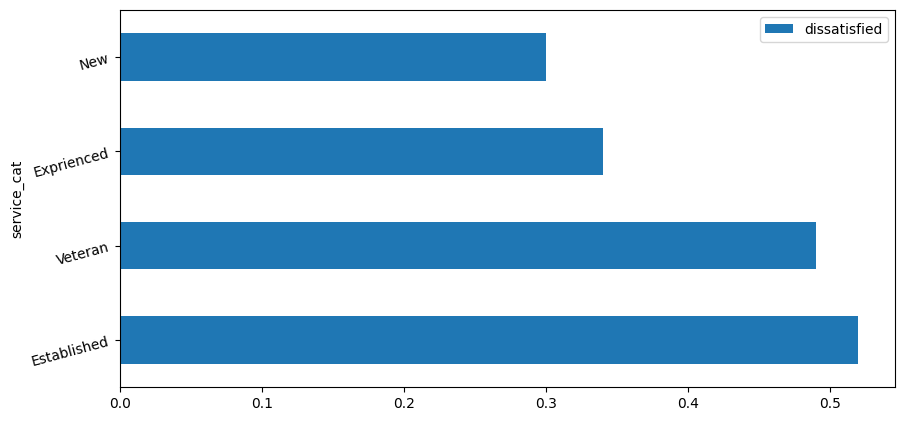

In [158]:
%matplotlib inline
# Plot of the percentage of dissatisfied employees per service category
dis_pct.plot(kind="barh", rot=15, figsize=(10, 5))